In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
path = "..\data\ds_salaries.xlsx"
df = pd.read_excel(path)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\cison\AppData\Local\Temp\ipykernel_13832\2736073903.py:1: SyntaxWarning: invalid escape sequence '\d'
  path = "..\data\ds_salaries.xlsx"


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


## ELT

In [15]:
def transform_dataframe(df) -> pd.DataFrame:
    df = df.drop('id',axis=1)

    df.rename(columns={'work_year': 'Work year', 'experience_level': 'Experience level', 'employment_type': 'Employment type', 'job_title': 'Job title', 'salary_in_usd': 'Salary usd', 'employee_residence': 'Employee residence', 'remote_ratio': 'Remote ratio', 'company_location': 'Company location', 'company_size': 'Company size'}, inplace=True)

    df.replace({'Employment type': {
        'FT': 'Full Time',
        'PT': 'Part Time',
        'CT': 'Contract',
        'FL': 'Freelance'
    }}, inplace=True)

    df.replace({'Company size': {
        'L': 'Large',
        'S': 'Small',
        'M': 'Medium'
    }}, inplace=True)

    df.replace({'Experience level': {
        'MI': 'Mid-level',
        'SE': 'Senior',
        'EN': 'Entry Level',
        'EX': 'Experienced'
    }}, inplace=True)
    
    return df

df = transform_dataframe(df)

# FUNÇÕES AUXILIARES

In [12]:

def formatar_numero(valor):
        if valor >= 1000000:
            return '{:.1f} MM'.format(valor / 1000000)
        elif valor >= 1000:
            return '{:.1f} Mil'.format(valor / 1000)
        else:
            return '{:,.0f}'.format(valor)


# Respostas Perguntas da Análises

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Work year           607 non-null    int64 
 1   Experience level    607 non-null    object
 2   Employment type     607 non-null    object
 3   Job title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   Salary usd          607 non-null    int64 
 7   Employee residence  607 non-null    object
 8   Remote ratio        607 non-null    int64 
 9   Company location    607 non-null    object
 10  Company size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


## Repostas para:
("1 - Qual a média geral dos salários do ano selecionado?", "SIM")

('2 - Qual a mediana geral dos salários do ano selecionado?', "SIM")

('3 - Qual o valor do desvio padrão geral dos salários do ano selecionado?', "SIM")

("4 - Qual o maior salário do ano selecionado?","SIM")

("5 - Qual o menor salário do ano selecionado?","SIM")

In [25]:
# respostas
media_salarial = formatar_numero(df['Salary usd'].mean())
mediana_salarial = formatar_numero(df['Salary usd'].median())
maior_salario = formatar_numero(df['Salary usd'].max())
menor_salario = formatar_numero(df['Salary usd'].min())
desvio_padrao = formatar_numero(df['Salary usd'].std())
quantile_0_25 = formatar_numero(df['Salary usd'].quantile(0.25))
quantile_0_75 = formatar_numero(df['Salary usd'].quantile(0.75))
amplitude = formatar_numero(df['Salary usd'].max() - df['Salary usd'].min())

IQR = formatar_numero(df['Salary usd'].quantile(0.75) - df['Salary usd'].quantile(0.25))

print(f"A média salarial é de: {media_salarial}")
print(f"A mediana dos salarios é: {media_salarial}")
print(f"O maior salário é: {maior_salario}")
print(f"O menor salário é: {menor_salario}")
print(f"O desvio padrão dos salários é: {desvio_padrao}")
print(f"O 1º Quartil é: {quantile_0_25}")
print(f"O 3º Quartil é: {quantile_0_75}")
print(f"A amplitude dos salários é: {amplitude}")
print(f"O IQR é: {IQR}")

A média salarial é de: 112.3 Mil
A mediana dos salarios é: 112.3 Mil
O maior salário é: 600.0 Mil
O menor salário é: 2.9 Mil
O desvio padrão dos salários é: 71.0 Mil
O 1º Quartil é: 62.7 Mil
O 3º Quartil é: 150.0 Mil
A amplitude dos salários é: 597.1 Mil
O IQR é: 87.3 Mil


# 6 - Resposta: Qual é a distribuição dos níveis de experiência dos funcionários?

In [43]:
experience_distribuicao = df['Experience level']
df_experience_counts = experience_distribuicao.value_counts().reset_index()
df_experience_counts = df_experience_counts.rename(columns={'index': 'Nível de Experiência', 'count': 'Contagem'})
df_experience_counts

,Experience level,Contagem
0,Senior,280
1,Mid-level,213
2,Entry Level,88
3,Experienced,26


C:\Users\cison\AppData\Local\Temp\ipykernel_13832\93495753.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart2 = sns.barplot(


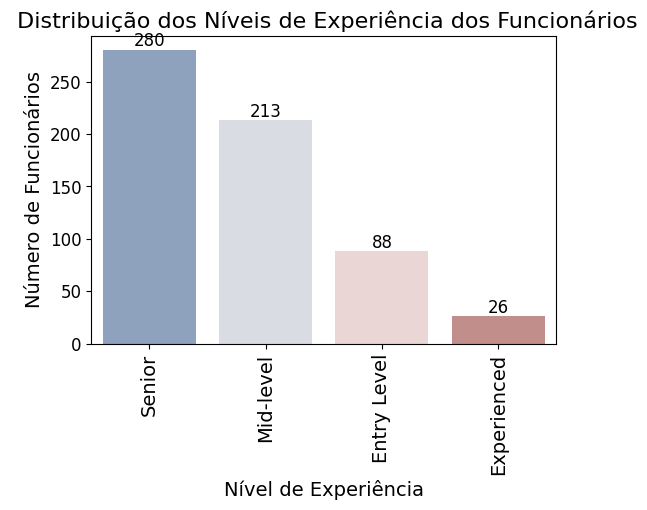

In [44]:
plt.figure(figsize=(6,4))

chart2 = sns.barplot(
            x=list(df_experience_counts['Experience level']), 
            y=list(df_experience_counts['Contagem']), 
            palette='vlag')

plt.title(' Distribuição dos Níveis de Experiência dos Funcionários',fontsize=16)
plt.xlabel('Nível de Experiência', fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Número de Funcionários', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(rotation=90)

for index, value in enumerate(df_experience_counts['Contagem']):
        chart2.text(index, value, str(value), ha='center', va='bottom', fontsize=12)

In [ ]:
df.info()

In [ ]:
print(df['experience_level'].value_counts())
print(df['employment_type'].value_counts())
print(df['employee_residence'].value_counts())
# e assim por diante para outras colunas categóricas


In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['salary_in_usd'], bins=20)
plt.xlabel('Salário em USD')
plt.ylabel('Frequência')
plt.title('Distribuição de Salários')
plt.show()


In [ ]:
import seaborn as sns

sns.scatterplot(x='work_year', y='salary_in_usd', data=df)
plt.xlabel('Anos de Experiência')
plt.ylabel('Salário em USD')
plt.title('Relação entre Anos de Experiência e Salário')
plt.show()

# ou matriz de correlação
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='company_size', data=df, order=df['company_size'].value_counts().index)
plt.xlabel('Tamanho da Empresa')
plt.ylabel('Contagem')
plt.title('Distribuição de Tamanhos de Empresas')
plt.xticks(rotation=45)
plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='company_size', data=df, order=df['company_size'].value_counts().index)
plt.xlabel('Tamanho da Empresa')
plt.ylabel('Contagem')
plt.title('Distribuição de Tamanhos de Empresas')
plt.xticks(rotation=45)
plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='employment_type', y='salary_in_usd', data=df)
plt.xlabel('Tipo de Emprego')
plt.ylabel('Salário em USD')
plt.title('Distribuição de Salários por Tipo de Emprego')
plt.xticks(rotation=45)
plt.show()


In [ ]:
remote_ratio_counts = df['remote_ratio'].value_counts()
plt.figure(figsize=(8, 6))
remote_ratio_counts.plot(kind='bar')
plt.xlabel('Proporção de Trabalho Remoto')
plt.ylabel('Contagem')
plt.title('Proporção de Trabalho Remoto vs. Trabalho no Local')
plt.xticks(rotation=45)
plt.show()



In [104]:
def formatar_numero(valor):
    if valor >= 1000000:
        return '{:.0f}M'.format(valor / 1000000)
    elif valor >= 1000:
        return '{:.0f}K'.format(valor / 1000)
    else:
        return '{:,.0f}'.format(valor)

In [111]:

df_filtered = df.loc[(df['Remote ratio'].isin([0,100])), ['Job title', 'Salary usd', 'Experience level', 'Remote ratio']]

mapping = {100: 'Remoto', 0: 'Presencial'}
df_filtered['Remote ratio'] = df_filtered['Remote ratio'].map(mapping)
    
pivot = df_filtered.pivot_table(
    values='Salary usd',
    index=['Job title', 'Remote ratio' ],
    columns=['Experience level'],
    aggfunc='mean',
    fill_value=0
)

pivot.map(formatar_numero)

Experience level                    Entry Level Experienced Mid-level Senior
Job title              Remote ratio                                         
AI Scientist           Presencial             0           0      120K      0
                       Remoto               14K           0      200K    55K
Analytics Engineer     Presencial             0           0         0   195K
                       Remoto                 0        155K         0      0
Applied Data Scientist Presencial          110K           0         0      0
...                                         ...         ...       ...    ...
Product Data Analyst   Presencial             0           0       20K      0
                       Remoto                 0           0        6K      0
Research Scientist     Presencial          100K           0      257K      0
                       Remoto              120K           0      126K    50K
Staff Data Scientist   Remoto                 0           0         0   105K

[68 rows x 4 columns]

,Job title,Experience level
0,Data Scientist,Mid-level
1,Machine Learning Scientist,Senior
2,Big Data Engineer,Senior
3,Product Data Analyst,Mid-level
4,Machine Learning Engineer,Senior
...,...,...
602,Data Engineer,Senior
603,Data Engineer,Senior
604,Data Analyst,Senior
605,Data Analyst,Senior
